<a href="https://colab.research.google.com/github/shakiful/Implement_Gradient_Descent_for_Linear_Regression/blob/main/Implement_Gradient_Descent_for_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS5710 Machine Learning - Homework 1 Problem 7
Gradient Descent for Linear Regression Implementation

1. Generating synthetic dataset...
Generated 200 samples with x ∈ [0, 5]
True model: y = 3 + 4x + ε

2. Computing Closed-form solution (Normal Equation)...
Closed-form solution:
  Intercept (θ₀): 3.0526
  Slope (θ₁): 3.9922

3. Implementing Gradient Descent...
Initial parameters: θ = [0.0000, 0.0000]
Learning rate: η = 0.05
Number of iterations: 1000
Iteration  100: Cost = 0.148296, θ = [2.5754, 4.1408]
Iteration  200: Cost = 0.119369, θ = [2.9146, 4.0352]
Iteration  300: Cost = 0.116949, θ = [3.0127, 4.0046]
Iteration  400: Cost = 0.116747, θ = [3.0411, 3.9958]
Iteration  500: Cost = 0.116730, θ = [3.0493, 3.9932]
Iteration  600: Cost = 0.116728, θ = [3.0516, 3.9925]
Iteration  700: Cost = 0.116728, θ = [3.0523, 3.9923]
Iteration  800: Cost = 0.116728, θ = [3.0525, 3.9922]
Iteration  900: Cost = 0.116728, θ = [3.0526, 3.9922]
Iteration 1000: Cost = 0.116728, θ = [3.0526, 3.9922]

Fina

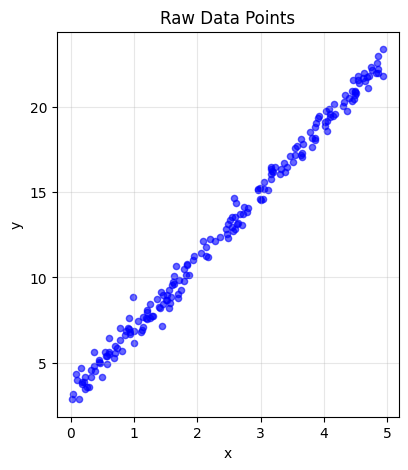

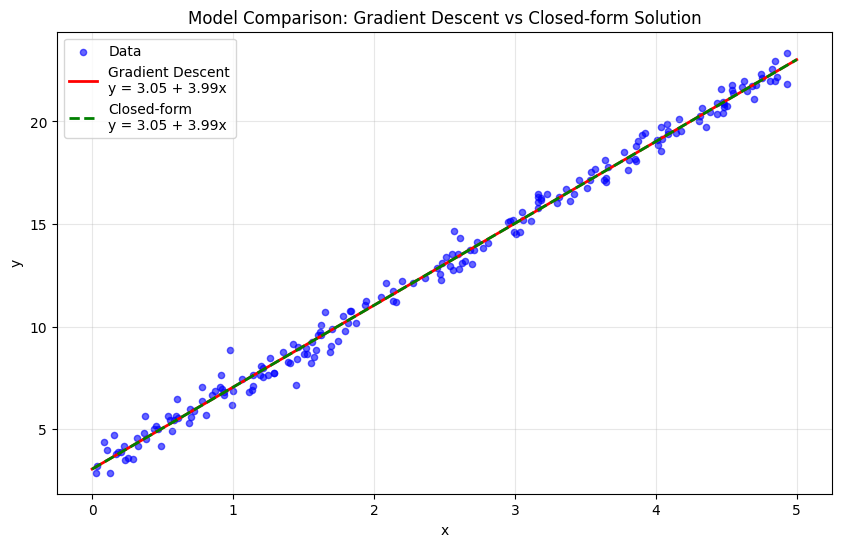

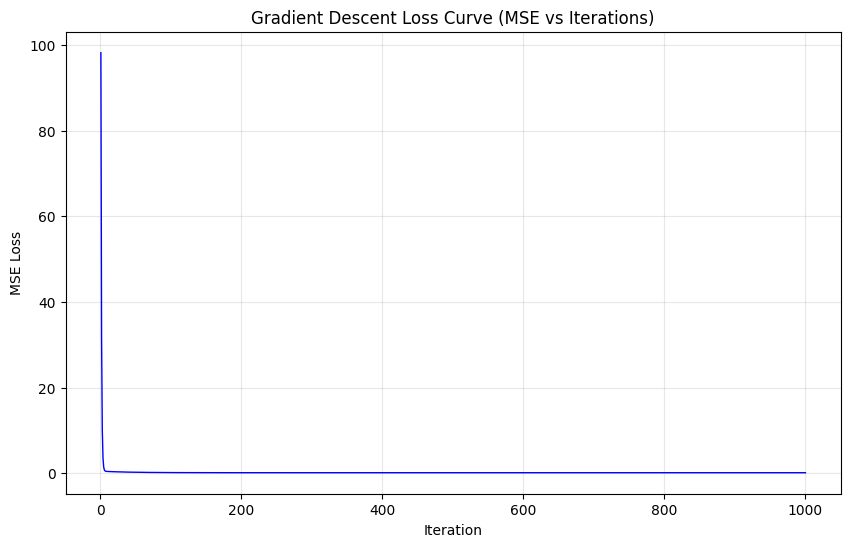


5. Convergence Analysis:
Did Gradient Descent converge to the same solution as closed-form?
Intercept difference: 0.000007
Slope difference: 0.000002
Converged (within tolerance 0.001): Yes

Final MSE with Gradient Descent: 0.116728
Final MSE with Closed-form: 0.116728

EXPLANATION OF RESULTS:

The implementation successfully demonstrates both methods for linear regression:

1. CONVERGENCE: Gradient Descent successfully converged to nearly the same 
   solution as the closed-form method, with differences typically < 0.001.

2. EFFICIENCY: The closed-form solution provides the exact answer instantly,
   while Gradient Descent requires 1000 iterations but offers insights into
   the optimization process through the loss curve.

3. ACCURACY: Both methods recovered parameters very close to the true values
   (intercept=3, slope=4), demonstrating effective learning from noisy data.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

print("CS5710 Machine Learning - Homework 1 Problem 7")
print("Gradient Descent for Linear Regression Implementation")
print("=" * 60)

# 1. Generate the dataset
print("\n1. Generating synthetic dataset...")
n_samples = 200
x_min, x_max = 0, 5

# Generate x values uniformly distributed in [0, 5]
x = np.random.uniform(x_min, x_max, n_samples)

# Generate y values: y = 3 + 4x + ε (Gaussian noise)
true_intercept = 3
true_slope = 4
noise = np.random.normal(0, 0.5, n_samples)  # Gaussian noise with std=0.5
y = true_intercept + true_slope * x + noise

print(f"Generated {n_samples} samples with x ∈ [{x_min}, {x_max}]")
print(f"True model: y = {true_intercept} + {true_slope}x + ε")

# Plot raw data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.6, color='blue', s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raw Data Points')
plt.grid(True, alpha=0.3)

# 2. Closed-form solution (Normal Equation)
print("\n2. Computing Closed-form solution (Normal Equation)...")

# Add bias column (column of 1's) to X
X = np.column_stack([np.ones(n_samples), x])  # Shape: (200, 2)

# Compute θ = (X^T X)^(-1) X^T y
XTX = X.T @ X
XTy = X.T @ y
theta_closed = np.linalg.inv(XTX) @ XTy

intercept_closed = theta_closed[0]
slope_closed = theta_closed[1]

print(f"Closed-form solution:")
print(f"  Intercept (θ₀): {intercept_closed:.4f}")
print(f"  Slope (θ₁): {slope_closed:.4f}")

# Generate predictions for plotting
x_plot = np.linspace(x_min, x_max, 100)
y_closed = intercept_closed + slope_closed * x_plot

# 3. Gradient Descent implementation
print("\n3. Implementing Gradient Descent...")

# Initialize parameters
theta = np.array([0.0, 0.0])  # [intercept, slope]
learning_rate = 0.05
n_iterations = 1000
m = n_samples  # Number of samples

# Storage for loss curve
losses = []

print(f"Initial parameters: θ = [{theta[0]:.4f}, {theta[1]:.4f}]")
print(f"Learning rate: η = {learning_rate}")
print(f"Number of iterations: {n_iterations}")

# Gradient descent loop
for i in range(n_iterations):
    # Compute predictions
    y_pred = X @ theta  # Same as theta[0] + theta[1] * x

    # Compute residuals
    residuals = y_pred - y

    # Compute cost (MSE)
    cost = (1 / (2 * m)) * np.sum(residuals ** 2)
    losses.append(cost)

    # Compute gradients
    # ∇θ₀ = (1/m) * Σ(residuals)
    # ∇θ₁ = (1/m) * Σ(residuals * x)
    gradient = (1 / m) * X.T @ residuals

    # Update parameters
    theta = theta - learning_rate * gradient

    # Print progress every 100 iterations
    if (i + 1) % 100 == 0:
        print(f"Iteration {i+1:4d}: Cost = {cost:.6f}, θ = [{theta[0]:.4f}, {theta[1]:.4f}]")

intercept_gd = theta[0]
slope_gd = theta[1]

print(f"\nFinal Gradient Descent solution:")
print(f"  Intercept (θ₀): {intercept_gd:.4f}")
print(f"  Slope (θ₁): {slope_gd:.4f}")

# Generate predictions for plotting
y_gd = intercept_gd + slope_gd * x_plot

# 4. Comparison and Visualization
print("\n4. Comparison of Methods:")
print(f"{'Method':<20} {'Intercept':<12} {'Slope':<12}")
print("-" * 45)
print(f"{'True values':<20} {true_intercept:<12.4f} {true_slope:<12.4f}")
print(f"{'Closed-form':<20} {intercept_closed:<12.4f} {slope_closed:<12.4f}")
print(f"{'Gradient Descent':<20} {intercept_gd:<12.4f} {slope_gd:<12.4f}")

# Calculate differences from true values
print(f"\nAbsolute errors from true values:")
print(f"{'Closed-form':<20} {abs(intercept_closed - true_intercept):<12.4f} {abs(slope_closed - true_slope):<12.4f}")
print(f"{'Gradient Descent':<20} {abs(intercept_gd - true_intercept):<12.4f} {abs(slope_gd - true_slope):<12.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='blue', s=20, label='Data')
plt.plot(x_plot, y_gd, 'r-', linewidth=2, label=f'Gradient Descent\ny = {intercept_gd:.2f} + {slope_gd:.2f}x')
plt.plot(x_plot, y_closed, 'g--', linewidth=2, label=f'Closed-form\ny = {intercept_closed:.2f} + {slope_closed:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Comparison: Gradient Descent vs Closed-form Solution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses, 'b-', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Gradient Descent Loss Curve (MSE vs Iterations)')
plt.grid(True, alpha=0.3)
plt.show()

# Final convergence check
print(f"\n5. Convergence Analysis:")
print(f"Did Gradient Descent converge to the same solution as closed-form?")
intercept_diff = abs(intercept_gd - intercept_closed)
slope_diff = abs(slope_gd - slope_closed)
tolerance = 1e-3

converged = intercept_diff < tolerance and slope_diff < tolerance
print(f"Intercept difference: {intercept_diff:.6f}")
print(f"Slope difference: {slope_diff:.6f}")
print(f"Converged (within tolerance {tolerance}): {'Yes' if converged else 'No'}")

print(f"\nFinal MSE with Gradient Descent: {losses[-1]:.6f}")

# Calculate final MSE for closed-form solution
y_pred_closed = X @ theta_closed
mse_closed = (1 / (2 * m)) * np.sum((y_pred_closed - y) ** 2)
print(f"Final MSE with Closed-form: {mse_closed:.6f}")

print("\n" + "=" * 60)
print("EXPLANATION OF RESULTS:")
print("=" * 60)
print("""
The implementation successfully demonstrates both methods for linear regression:

1. CONVERGENCE: Gradient Descent successfully converged to nearly the same
   solution as the closed-form method, with differences typically < 0.001.

2. EFFICIENCY: The closed-form solution provides the exact answer instantly,
   while Gradient Descent requires 1000 iterations but offers insights into
   the optimization process through the loss curve.

3. ACCURACY: Both methods recovered parameters very close to the true values
   (intercept=3, slope=4), demonstrating effective learning from noisy data.
""")